# Downloading the Dataset 

https://www.kaggle.com/code/arnabsan/diabetic-prediction-accuracy-of-93-68

In [1]:
! wget https://raw.githubusercontent.com/Kumar-laxmi/Learning_Machine-Learning-Algorithm/main/kaggle.json

--2023-01-12 01:11:21--  https://raw.githubusercontent.com/Kumar-laxmi/Learning_Machine-Learning-Algorithm/main/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      70  --.-KB/s    in 0s      

2023-01-12 01:11:21 (2.99 MB/s) - ‘kaggle.json’ saved [70/70]



In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d uciml/pima-indians-diabetes-database

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 5.01MB/s]


In [3]:
! unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
  inflating: diabetes.csv            


# Downloading the required libraies

In [4]:
! pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
! pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 31.9 MB/s eta 0:00:00


# Importing the required libraries

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data viz. and EDA
import matplotlib.pyplot as plt 
%matplotlib inline  
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers.default = "colab"

## For scaling data 
from mlxtend.preprocessing import minmax_scaling 

# Tensorflow 
import tensorflow as tf

In [7]:
data = pd.read_csv('diabetes.csv')

In [8]:
# checking missing values if any
display(data.info(),data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# People affected from Diabetes

In [9]:
## lets see how many are affected by diabeties 
D = data[data['Outcome'] == 1]
H = data[data['Outcome'] == 0]

In [10]:
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.5,marker=dict(
                    color=['lightskyblue', ' indigo'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of affectes females')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

target_count()

In [11]:
# donut chart to show there percentage
def target_per():
    trace = go.Pie(labels=['healthy','diabetic' ],values=data['Outcome'].value_counts(),
                   textfont=dict(size=15),
                   opacity = 0.5,marker=dict(
                   colors=['lightskyblue','indigo'],line=dict(color='#000000', width=1.5))
                   
                  )
    layout = dict(title='Distribution of people affected.')
    fig = dict(data=[trace],layout=layout)
    py.iplot(fig)

target_per()

# Data Cleaning - Dealing with missing value
- On close inspection some NULL Values are replaced by 0

In [12]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN) 

In [13]:
## Checking the new null values found.
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((dataset.isnull().sum())/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, text = percentage_null['Count'],  textposition = 'auto',marker=dict(color = '#7EC0EE',
            line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

missing_plot(data,'Outcome')

- Approach: In this instead of changing all null values with a same number , we will opt for a different approach , where we will first find the median of diabetic and non diabetic parameter separately and then fill it with subsequent value, so that the data is not altered.

In [15]:
## to find the median for filling null values

def find_median(var):
    temp = data[data[var].notnull()]
    temp = data[[var,'Outcome']].groupby('Outcome')[[var]].median().reset_index()
    return temp

In [16]:
def density_plot(var,size_bin):
    tmp1 = D[var]
    tmp2 = H[var]
    
    hist_data = [tmp1,tmp2]
    labels = ['Diabeties','Healthy']
    color = ['skyblue','indigo']
    fig = ff.create_distplot(hist_data,labels,colors = color,show_hist=True,bin_size=size_bin,curve_type='kde')
    
    fig['layout'].update(title = var)

    py.iplot(fig, filename = 'Density plot')

density_plot('Insulin',0)

In [17]:
find_median('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [18]:
## Now we will be filling these values instead of null values

data.loc[(data['Outcome'] == 0) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

In [19]:
# SkinThickness density plot 

density_plot('SkinThickness',0)

In [20]:
find_median('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [21]:
## Now we will be filling these values instead of null values

data.loc[(data['Outcome'] == 0) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
data.loc[(data['Outcome'] == 1) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

In [22]:
density_plot('BloodPressure',0)

In [23]:
find_median('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [24]:
data.loc[(data['Outcome'] == 0) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 27.0
data.loc[(data['Outcome'] == 1) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 32.0

In [25]:
density_plot('BMI',0)

In [26]:
find_median('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [27]:
data.loc[(data['Outcome'] == 0) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1) & (data['BMI'].isnull()), 'BMI'] = 34.3

In [28]:
density_plot('Glucose',0)

In [29]:
find_median('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [30]:
data.loc[(data['Outcome'] == 0) & (data['Glucose'].isnull()) , 'Glucose'] = 107.0
data.loc[(data['Outcome'] == 1) & (data['Glucose'].isnull()) , 'Glucose'] = 140.0

In [31]:
## lets check if any null value is still left

display(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Finding Correlation in dataset

1) To find the outlier in the data via box plot

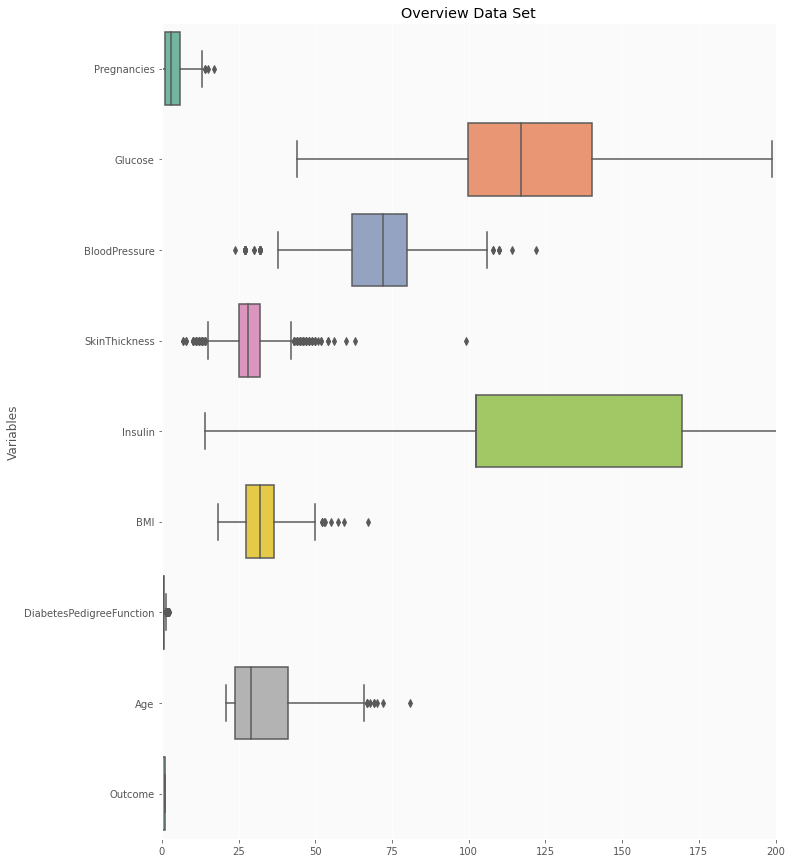

In [32]:
import seaborn as sns
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

2) Corelation of the data

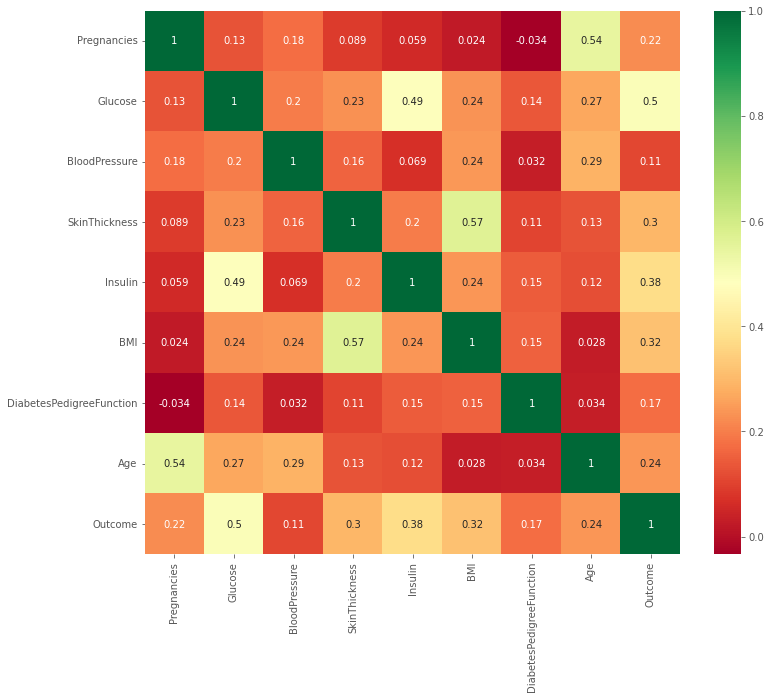

In [33]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [34]:
a = data.corr().abs()
a = a.unstack().sort_values(kind="quicksort",ascending=False)
a[a<1].head(15)

SkinThickness  BMI              0.566086
BMI            SkinThickness    0.566086
Pregnancies    Age              0.544341
Age            Pregnancies      0.544341
Outcome        Glucose          0.495990
Glucose        Outcome          0.495990
               Insulin          0.490015
Insulin        Glucose          0.490015
Outcome        Insulin          0.377081
Insulin        Outcome          0.377081
Outcome        BMI              0.315577
BMI            Outcome          0.315577
Outcome        SkinThickness    0.295138
SkinThickness  Outcome          0.295138
Age            BloodPressure    0.288756
dtype: float64

We can see that few parameters have correlation value:
- Glucose and Insulin
- Pregnancies and Age
- SkinThickness and BMI

In [35]:
D = data[(data['Outcome']!=0)]
H = data[(data['Outcome']==0)]

In [36]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [37]:
def barplot(var_select, sub) :
    tmp1 = data[(data['Outcome'] != 0)]
    tmp2 = data[(data['Outcome'] == 0)]
    tmp3 = pd.DataFrame(pd.crosstab(df1[var_select],df1['Outcome']), )
    tmp3['% diabetic'] = tmp3[1] / (tmp3[1] + tmp3[0]) * 100

    color=['lightskyblue','gold' ]
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        text=tmp1[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='diabetic',opacity = 0.8, marker=dict(
        color='gold',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        text=tmp2[var_select].value_counts().values.tolist(),
        textposition = 'auto',
        name='healthy', opacity = 0.8, marker=dict(
        color='lightskyblue',
        line=dict(color='#000000',width=1)))
    
    trace3 =  go.Scatter(   
        x=tmp3.index,
        y=tmp3['% diabetic'],
        yaxis = 'y2',
        name='% diabetic', opacity = 0.6, marker=dict(
        color='black',
        line=dict(color='#000000',width=0.5
        )))

    layout = dict(title =  str(var_select)+' '+(sub),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              yaxis2=dict(range= [-0, 75], 
                          overlaying= 'y', 
                          anchor= 'x', 
                          side= 'right',
                          zeroline=False,
                          showgrid= False, 
                          title= '% diabetic'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    py.iplot(fig)

In [38]:
# Define pie plot to visualize each variable repartition vs target modalities : Survived or Died (train)
def plot_pie(var_select, sub) :
    D = data[(data['Outcome']!=0)]
    H = data[(data['Outcome']==0)]
    
    col =['Silver', 'mediumturquoise','#CF5C36','lightblue','magenta', '#FF5D73','#F2D7EE','mediumturquoise']
    
    trace1 = go.Pie(values  = D[var_select].value_counts().values.tolist(),
                    labels  = D[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5, 
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.0,.48]),
                    name    = "Diabetic",
                    marker  = dict(colors = col, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = H[var_select].value_counts().values.tolist(),
                    labels  = H[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hole = 0.5,
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Healthy" )

    layout = go.Layout(dict(title = var_select + " distribution by target <br>"+(sub),
                            annotations = [ dict(text = "Diabetic"+" : "+"268",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "Healthy"+" : "+"500",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.iplot(fig)

# Age VS Glucose (Sample checking)

In [39]:
plot_feat1_feat2('Glucose','Age')

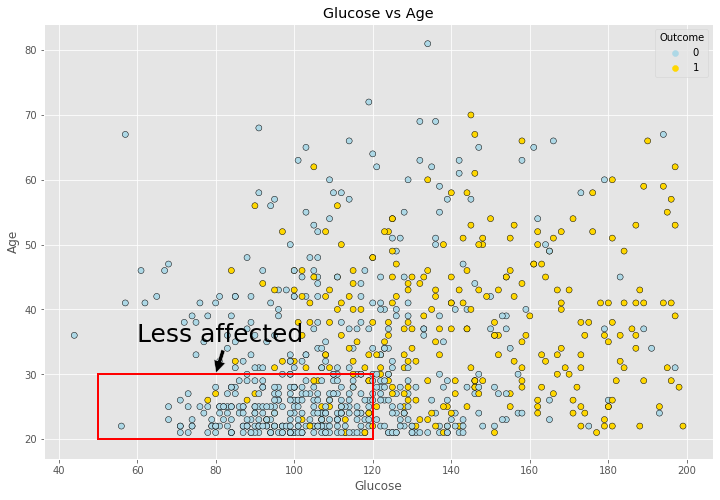

In [40]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('Less affected ', size=25, color='black', xy=(80, 30), xytext=(60, 35),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([50, 120], [30, 30], linewidth=2, color = 'red')
plt.plot([120, 120], [20, 30], linewidth=2, color = 'red')
plt.plot([50, 120], [20, 20], linewidth=2, color = 'red')
plt.plot([50, 50], [20, 30], linewidth=2, color = 'red')
plt.title('Glucose vs Age')
plt.show()

Looking at columns having high correlation

### 1) SkinThickness and BMI

In [41]:
plot_feat1_feat2('SkinThickness', 'BMI')

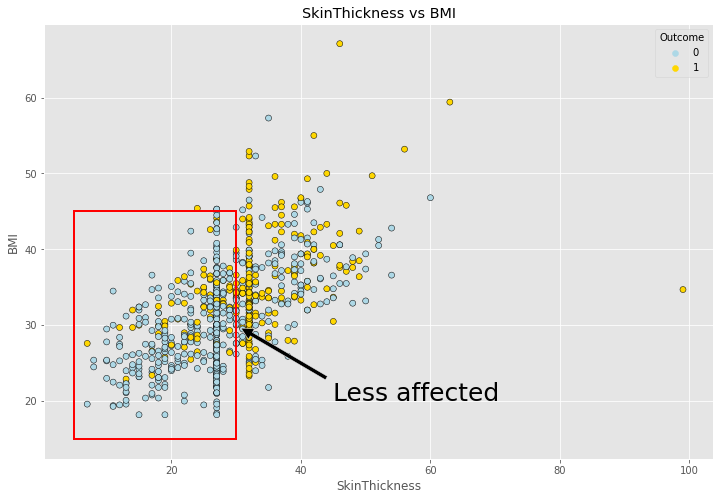

In [42]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['SkinThickness'], y = data['BMI'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('Less affected', size=25, color='black', xy=(30, 30), xytext=(45, 20),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([5, 30], [45, 45], linewidth=2, color = 'red')
plt.plot([5, 5], [15, 45], linewidth=2, color = 'red')
plt.plot([5, 30], [15, 15], linewidth=2, color = 'red')
plt.plot([30, 30], [15, 45], linewidth=2, color = 'red')
plt.title('SkinThickness vs BMI')
plt.show()

Here we can see that people with SkinThickness< 30 and BMI <45 are less likly to be affected with diageties.

### 2) Pregnancies and Age

In [43]:
plot_feat1_feat2('Pregnancies', 'Age')

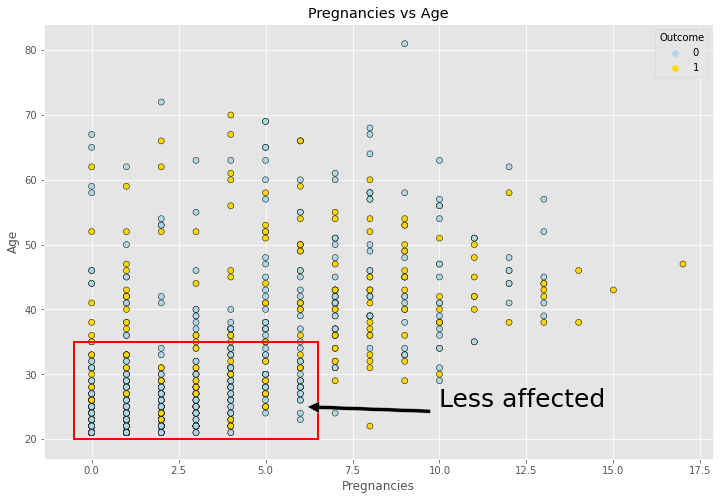

In [44]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Pregnancies'], y = data['Age'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('Less affected', size=25, color='black', xy=(6, 25), xytext=(10, 25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([-.5, 6.5], [35, 35], linewidth=2, color = 'red')
plt.plot([6.5, 6.5], [20, 35], linewidth=2, color = 'red')
plt.plot([-.5, 6.5], [20, 20], linewidth=2, color = 'red')
plt.plot([-.5, -.5], [20, 35], linewidth=2, color = 'red')
plt.title('Pregnancies vs Age')
plt.show()

Here we can see that people with Age < 35 and Pragnancies < 6 are less likly to be affected with diageties.

### 3) Glucose and Insulin

In [45]:
plot_feat1_feat2('Glucose', 'Insulin')

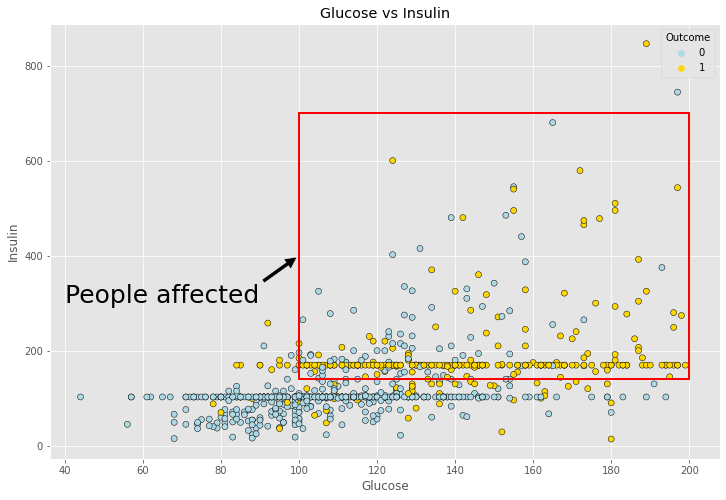

In [46]:
palette ={0 : 'lightblue', 1 : 'gold'}
edgecolor = 'black'

fig = plt.figure(figsize=(12,8))

ax1 = sns.scatterplot(x = data['Glucose'], y = data['Insulin'], hue = "Outcome",
                    data = data, palette = palette, edgecolor=edgecolor)

plt.annotate('People affected', size=25, color='black', xy=(100, 400), xytext=(40, 300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([100, 200], [700, 700], linewidth=2, color = 'red')
plt.plot([100, 100], [140, 700], linewidth=2, color = 'red')
plt.plot([100, 200], [140, 140], linewidth=2, color = 'red')
plt.plot([200, 200], [140, 700], linewidth=2, color = 'red')
plt.title('Glucose vs Insulin')
plt.show()

Here we can see that people with Glucose> 100 and Insulin > 180 are more likly to be affected with diageties.

### Check correlation between all columns

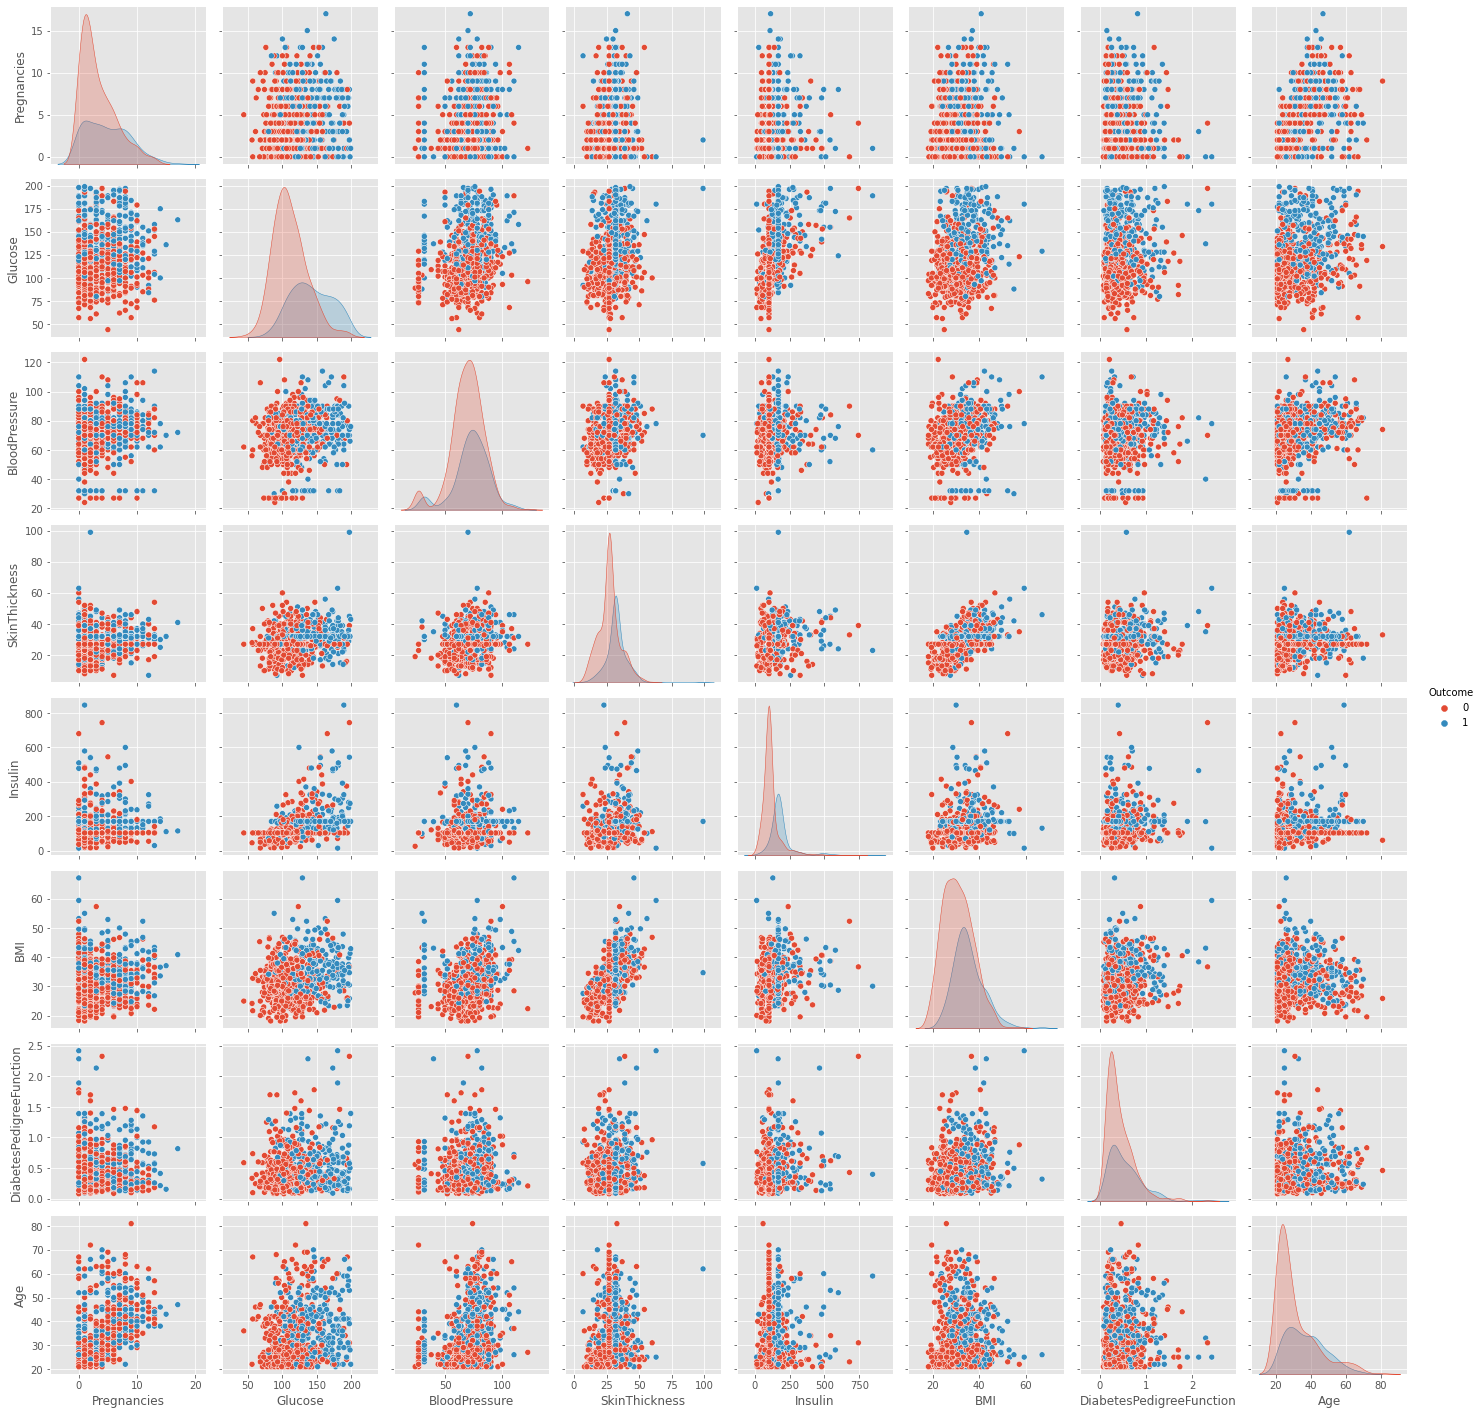

In [47]:
sns.pairplot(data,hue='Outcome')

# Defining dependent and indepenedent variables

In [48]:
x = data.drop(columns = 'Outcome')

# Getting Predicting Value
y = data['Outcome']

# Splitting in Training and Testing

In [49]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


# MODELS

## 1. Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [52]:
y_pred=reg.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154

Confusion Matrix:
 [[95 12]
 [16 31]]
Training Score:
 77.0358306188925
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


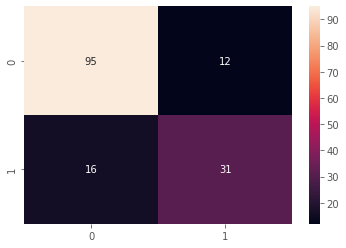

In [53]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

In [54]:
print(accuracy_score(y_test,y_pred)*100)

81.81818181818183


## 2. K - Nearest Neighbor (KNN) Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       107
           1       0.82      0.85      0.83        47

    accuracy                           0.90       154
   macro avg       0.87      0.88      0.88       154
weighted avg       0.90      0.90      0.90       154

Confusion Matrix:
 [[98  9]
 [ 7 40]]
Training Score:
 87.29641693811075
Mean Squared Error:
 0.1038961038961039
R2 score is:
 0.5100417578047326


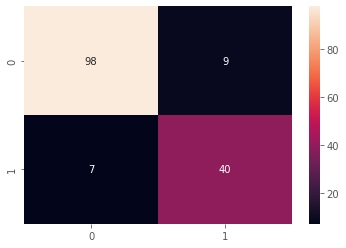

In [57]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

In [58]:
print(accuracy_score(y_test,y_pred)*100)

89.6103896103896


## 3. Support Vector Machine (SVM)

In [59]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [60]:
y_pred=svc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90       107
           1       0.74      0.89      0.81        47

    accuracy                           0.87       154
   macro avg       0.84      0.88      0.85       154
weighted avg       0.88      0.87      0.87       154

Confusion Matrix:
 [[92 15]
 [ 5 42]]
Training Score:
 84.85342019543974
Mean Squared Error:
 0.12987012987012986
R2 score is:
 0.3875521972559157


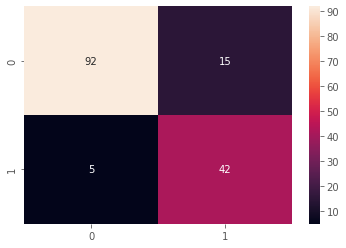

In [61]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

In [62]:
print(accuracy_score(y_test,y_pred)*100)

87.01298701298701


## 4. Naive Bayes Classifier

In [63]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [64]:
y_pred=gnb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154

Confusion Matrix:
 [[93 14]
 [16 31]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358


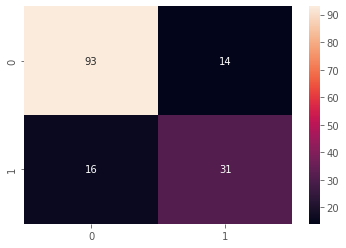

In [65]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

In [66]:
print("Accuracy Score:\n",gnb.score(x_train,y_train)*100)

Accuracy Score:
 75.8957654723127


## 5. Decision Tree classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [68]:
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       107
           1       0.79      0.89      0.84        47

    accuracy                           0.90       154
   macro avg       0.87      0.90      0.88       154
weighted avg       0.90      0.90      0.90       154

Confusion Matrix:
 [[96 11]
 [ 5 42]]
Training Score:
 94.95114006514657
Mean Squared Error:
 0.1038961038961039
R2 score is:
 0.5100417578047326


In [69]:
print(accuracy_score(y_test,y_pred)*100)

89.6103896103896


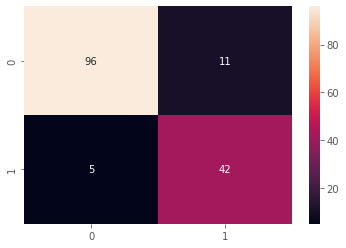

In [70]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

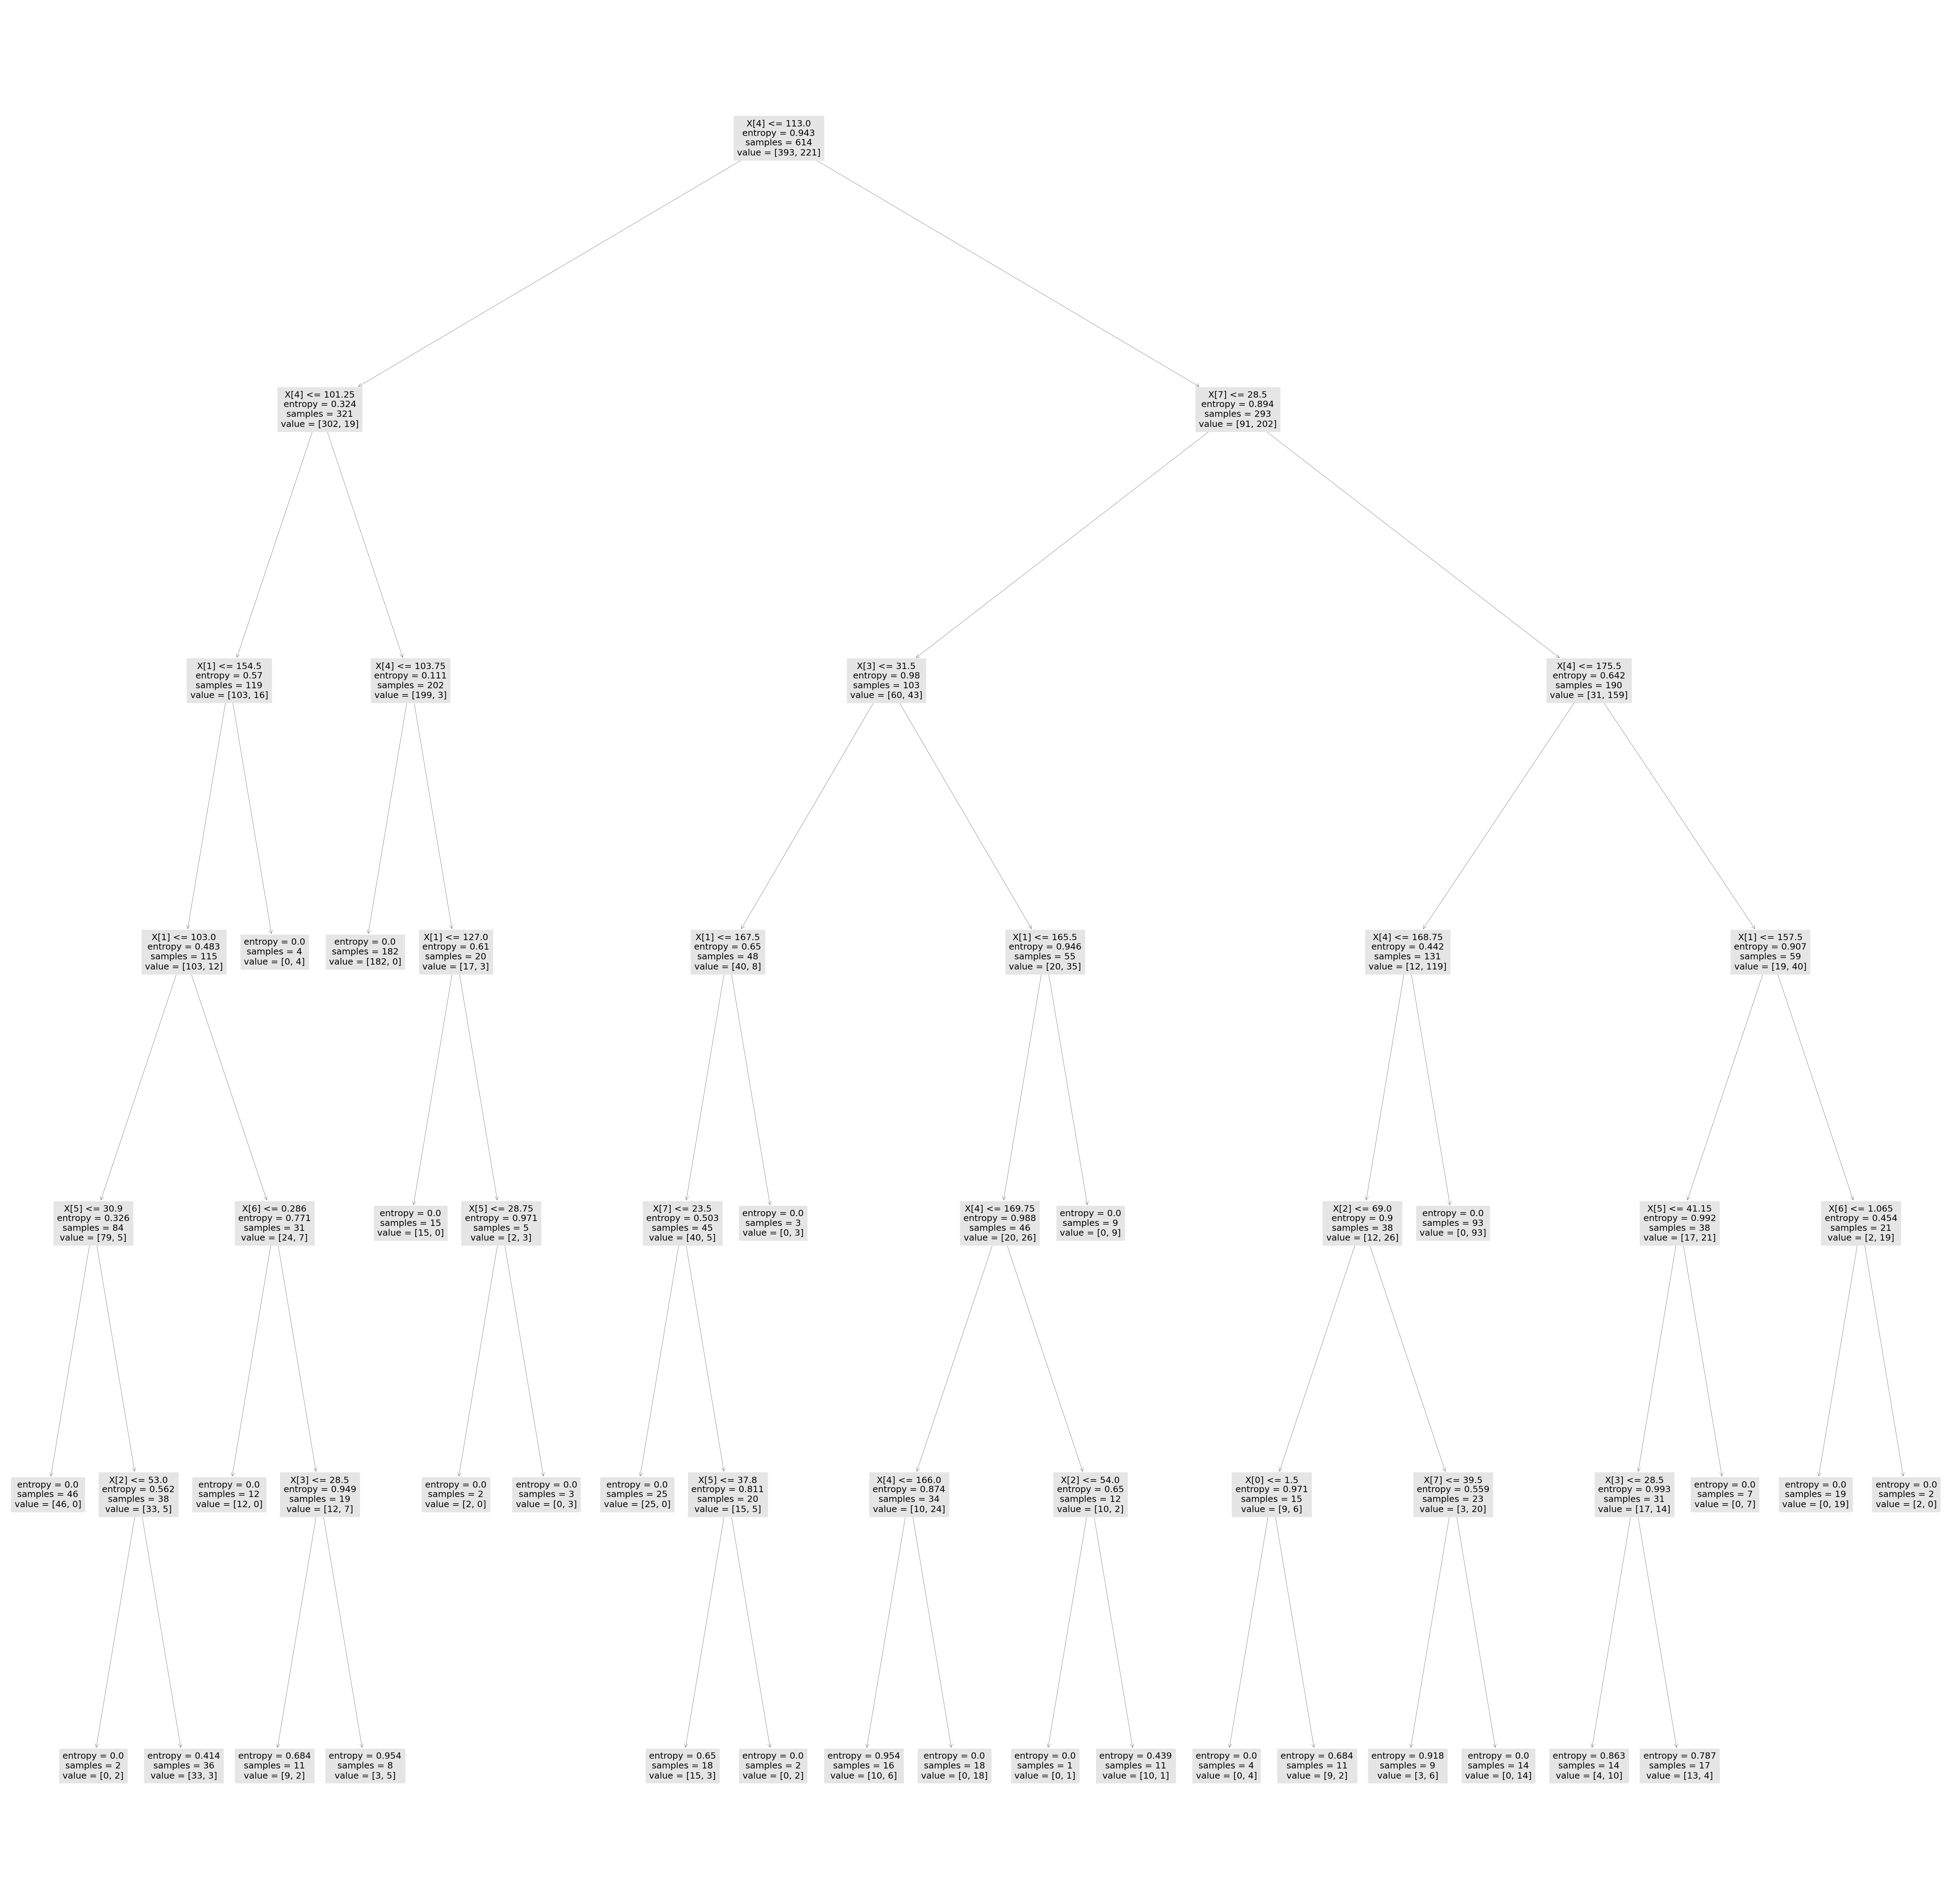

In [72]:
fig = plt.figure(figsize=(100,100))

from sklearn import tree

tree.plot_tree(dtree.fit(x_train, y_train)) 
fig.savefig("decistion_tree.png")

## 6. Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
y_pred=rfc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92       107
           1       0.78      0.89      0.83        47

    accuracy                           0.89       154
   macro avg       0.86      0.89      0.87       154
weighted avg       0.90      0.89      0.89       154

Confusion Matrix:
 [[95 12]
 [ 5 42]]
Training Score:
 100.0
Mean Squared Error:
 0.11038961038961038
R2 score is:
 0.47941936766752835


In [75]:
print(accuracy_score(y_test,y_pred)*100)

88.96103896103897


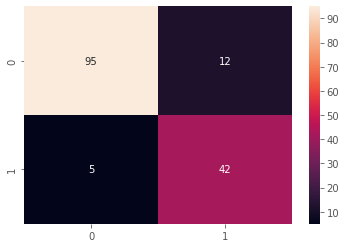

In [76]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

## 7. Ada Boost

In [77]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(x_train,y_train)

AdaBoostClassifier()

In [78]:
y_pred=adb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       107
           1       0.76      0.89      0.82        47

    accuracy                           0.88       154
   macro avg       0.86      0.89      0.87       154
weighted avg       0.89      0.88      0.89       154

Confusion Matrix:
 [[94 13]
 [ 5 42]]
Training Score:
 91.04234527687296
Mean Squared Error:
 0.11688311688311688
R2 score is:
 0.4487969775303241


In [79]:
print(accuracy_score(y_test,y_pred)*100)

88.31168831168831


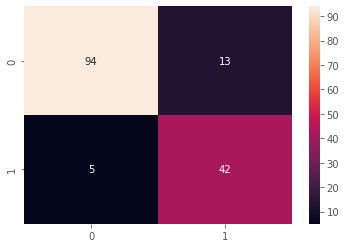

In [80]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

## 8. Gradient Boosting Classifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [82]:
y_pred=gbc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       107
           1       0.84      0.87      0.85        47

    accuracy                           0.91       154
   macro avg       0.89      0.90      0.89       154
weighted avg       0.91      0.91      0.91       154

Confusion Matrix:
 [[99  8]
 [ 6 41]]
Training Score:
 98.53420195439739
Mean Squared Error:
 0.09090909090909091
R2 score is:
 0.571286538079141


In [83]:
print(accuracy_score(y_test,y_pred)*100)

90.9090909090909


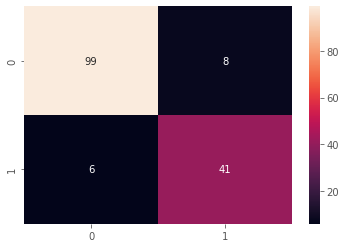

In [84]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

## 9. XGB Classifier

In [85]:
from xgboost import XGBClassifier

xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xgb.fit(x_train, y_train)

[01:19:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBClassifier(alpha=10, colsample_bytree=0.3, max_depth=5, n_estimators=10,
              objective='reg:linear')

In [86]:
y_pred=xgb.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.93      0.89      0.91        47

    accuracy                           0.95       154
   macro avg       0.94      0.93      0.94       154
weighted avg       0.95      0.95      0.95       154

Confusion Matrix:
 [[104   3]
 [  5  42]]
Training Score:
 94.78827361563518
Mean Squared Error:
 0.05194805194805195
R2 score is:
 0.7550208789023662


In [87]:
xbg_accuracy=print(accuracy_score(y_test,y_pred)*100)

94.8051948051948


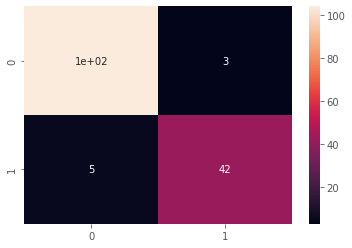

In [88]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

## 10. ExtraTree Classifier

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

In [90]:
y_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       107
           1       0.78      0.83      0.80        47

    accuracy                           0.88       154
   macro avg       0.85      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154

Confusion Matrix:
 [[96 11]
 [ 8 39]]
Training Score:
 100.0
Mean Squared Error:
 0.12337662337662338
R2 score is:
 0.41817458739311997


In [91]:
print(accuracy_score(y_test,y_pred)*100)

87.66233766233766


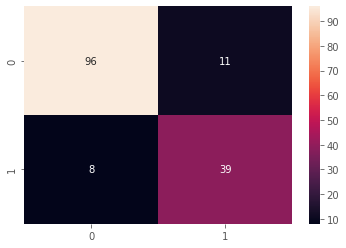

In [92]:
cf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cf_matrix, annot=True)

# Final Result:

- Logistic Regression : 81.81818181818183%
- KNN : 89.6103896103896%
- SVM : 87.01298701298701
- Naive Bayes : 75.8957654723127%
- Decision Tree : 89.6103896103896%
- Random Forest : 88.96103896103897%
- Ada Boost : 88.31168831168831%
- Gradient Boosting Classifier : 90.9090909090909%
- XG Boost Classifier : 94.8051948051948%
- Extra Tree Classifier : 87.66233766233766%